In [ ]:
# Import Dependencies
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2
import imghdr
import tensorflow as tf


**Preprocessing Data**

In [ ]:
Base_data = '/content/drive/MyDrive/AISummative/BreastCancer'

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(Base_data)


Found 1578 files belonging to 3 classes.


In [ ]:
data_dir = Base_data
image_exts = ['png']
image_size = (224,224)

for image_class in os.listdir(data_dir): 
    for image_name in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image_name)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts or 'mask' in image_name: 
                # print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
            else:
              img = cv2.resize(img, image_size)
              cv2.imwrite(image_path, img)

        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [ ]:
number_of_images = {}
for dir in os.listdir(Base_data):
  number_of_images[dir] = len(os.listdir(os.path.join(Base_data, dir)))

number_of_images.items()

dict_items([('benign', 437), ('malignant', 210), ('normal', 133)])

In [ ]:
from sklearn.preprocessing import LabelEncoder
unique_classes = []
for path in os.listdir(Base_data):
  unique_classes.append(path)

class_index = [unique_classes[2], unique_classes[1], unique_classes[0]]
label_encoder = LabelEncoder()
encoded_classes = label_encoder.fit_transform(class_index)
for c, e in zip(class_index, encoded_classes):
  print(c, "-", e)


normal - 2
malignant - 1
benign - 0


In [ ]:
data = tf.keras.utils.image_dataset_from_directory(Base_data)



Found 780 files belonging to 3 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

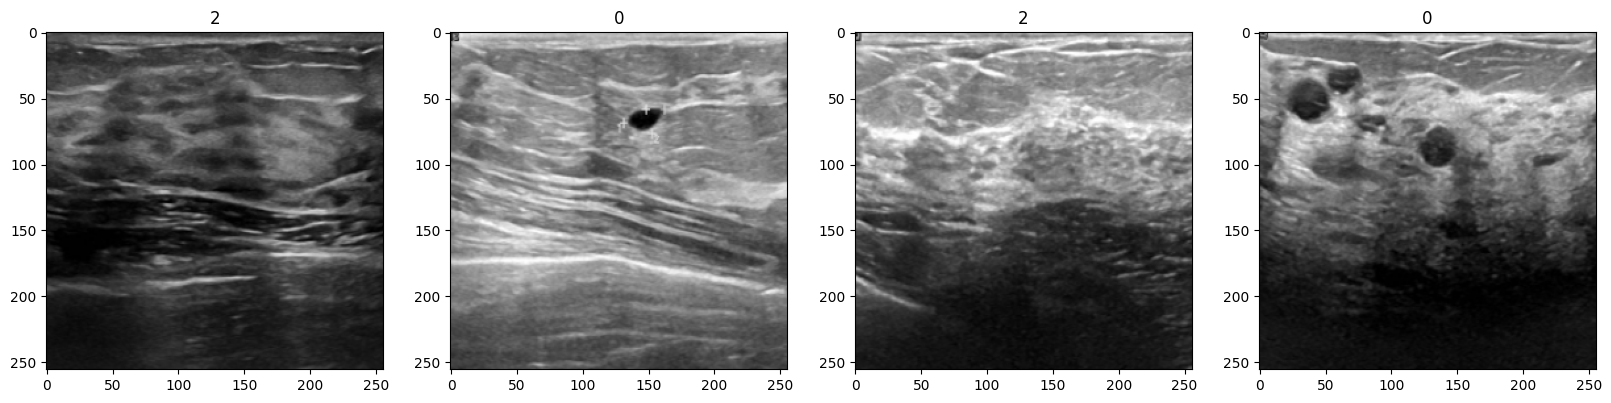

In [ ]:
# Labelled Title
# normal - 2
# malignant - 1
# benign - 0
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [ ]:
# Scale the data 
# We standardize the pixels to range 0-1

data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.70980394, 0.70980394, 0.70980394],
          [0.43259802, 0.43259802, 0.43259802],
          [0.64093137, 0.64093137, 0.64093137],
          ...,
          [0.73088235, 0.73088235, 0.73088235],
          [0.67132354, 0.67132354, 0.67132354],
          [0.62352943, 0.62352943, 0.62352943]],
 
         [[0.22867647, 0.22867647, 0.22867647],
          [0.35274205, 0.35274205, 0.35274205],
          [0.41271445, 0.41271445, 0.41271445],
          ...,
          [0.6342984 , 0.6342984 , 0.6342984 ],
          [0.61476713, 0.61476713, 0.61476713],
          [0.5980392 , 0.5980392 , 0.5980392 ]],
 
         [[0.09338235, 0.09338235, 0.09338235],
          [0.11727941, 0.11727941, 0.11727941],
          [0.2115962 , 0.2115962 , 0.2115962 ],
          ...,
          [0.6249847 , 0.6249847 , 0.6249847 ],
          [0.6017157 , 0.6017157 , 0.6017157 ],
          [0.5921569 , 0.5921569 , 0.5921569 ]],
 
         ...,
 
         [[0.07622549, 0.07622549, 0.07622549],
          [0.09952

**Split Data**

In [ ]:
# train - 0.7
# test - 0.15
# val - - 0.15

In [ ]:

import shutil
import math


def data_folder(p, split):
    if not os.path.exists("/content/drive/MyDrive/" + p):
        os.mkdir("/content/drive/MyDrive/" + p)
        for dir in os.listdir(Base_data):
            os.makedirs("/content/drive/MyDrive/" + p + "/" + dir)
            for img in np.random.choice(a=os.listdir(os.path.join(Base_data, dir)),
                                        size=(math.floor(split*number_of_images[dir])-5), replace=False):
              
                O = os.path.join(Base_data, dir, img)
                D = os.path.join("/content/drive/MyDrive/" + p, dir)
                shutil.copy(O, D)
                # os.remove(O)
    else:
        print(f"{p} Folder already exists")
      


In [ ]:
# New Datasets
data_folder('train', 0.7)
data_folder('test', 0.15)
data_folder('val', 0.15)


In [ ]:
train = '/content/drive/MyDrive/train'
test = '/content/drive/MyDrive/test'
val = '/content/drive/MyDrive/val'

**Data Augmentation**

In [ ]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

# train data
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip= True,  
)

# test data
test_datagen= ImageDataGenerator(rescale = 1./255)
# val data
val_datagen= ImageDataGenerator(rescale = 1./255)

#-----------
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/train', target_size=(224, 224), batch_size= 32, class_mode='categorical')
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/test', target_size=(224, 224), batch_size= 32, class_mode='categorical')
val_set = train_datagen.flow_from_directory('/content/drive/MyDrive/val', target_size=(224, 224), batch_size= 32, class_mode='categorical')

Found 530 images belonging to 3 classes.
Found 100 images belonging to 3 classes.
Found 100 images belonging to 3 classes.


In [ ]:
# Confirm if Images have been Normalized in the range of 0-1
training_set[0]


(array([[[[0.82069945, 0.82069945, 0.82069945],
          [0.82069945, 0.82069945, 0.82069945],
          [0.82069945, 0.82069945, 0.82069945],
          ...,
          [0.8220485 , 0.8220485 , 0.8220485 ],
          [0.8220485 , 0.8220485 , 0.8220485 ],
          [0.8220485 , 0.8220485 , 0.8220485 ]],
 
         [[0.86011183, 0.86011183, 0.86011183],
          [0.86011183, 0.86011183, 0.86011183],
          [0.86011183, 0.86011183, 0.86011183],
          ...,
          [0.78170484, 0.78170484, 0.78170484],
          [0.78170484, 0.78170484, 0.78170484],
          [0.78170484, 0.78170484, 0.78170484]],
 
         [[0.74101275, 0.74101275, 0.74101275],
          [0.74101275, 0.74101275, 0.74101275],
          [0.74101275, 0.74101275, 0.74101275],
          ...,
          [0.81765175, 0.81765175, 0.81765175],
          [0.81765175, 0.81765175, 0.81765175],
          [0.81765175, 0.81765175, 0.81765175]],
 
         ...,
 
         [[0.24330106, 0.24330106, 0.24330106],
          [0.24330

In [ ]:
# Training Set Classes
training_set.class_indices

{'benign': 0, 'malignant': 1, 'normal': 2}

**Building the Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization, Dense, Flatten, Dropout

# Keras sequential model
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [ ]:
# Model Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 111, 111, 16)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 54, 54, 32)       

In [ ]:
trainedM = model.fit(training_set, validation_data=val_set, epochs=20, batch_size=32)


Epoch 1/20
17/17 [==============================] - 12s 611ms/step - loss: 2.0749 - accuracy: 0.4000 - val_loss: 1.0894 - val_accuracy: 0.6000
Epoch 2/20
17/17 [==============================] - 10s 570ms/step - loss: 0.9649 - accuracy: 0.5660 - val_loss: 1.0754 - val_accuracy: 0.6000
Epoch 3/20
17/17 [==============================] - 8s 460ms/step - loss: 0.9581 - accuracy: 0.5660 - val_loss: 1.0789 - val_accuracy: 0.6000
Epoch 4/20
17/17 [==============================] - 9s 550ms/step - loss: 0.9541 - accuracy: 0.5660 - val_loss: 1.0724 - val_accuracy: 0.6000
Epoch 5/20
17/17 [==============================] - 9s 508ms/step - loss: 0.9477 - accuracy: 0.5660 - val_loss: 1.0702 - val_accuracy: 0.6000
Epoch 6/20
17/17 [==============================] - 8s 460ms/step - loss: 0.9422 - accuracy: 0.5679 - val_loss: 1.0819 - val_accuracy: 0.6800
Epoch 7/20
17/17 [==============================] - 9s 564ms/step - loss: 0.9325 - accuracy: 0.5698 - val_loss: 1.0617 - val_accuracy: 0.6800
Epoc

**Plotting Losss Graphs**

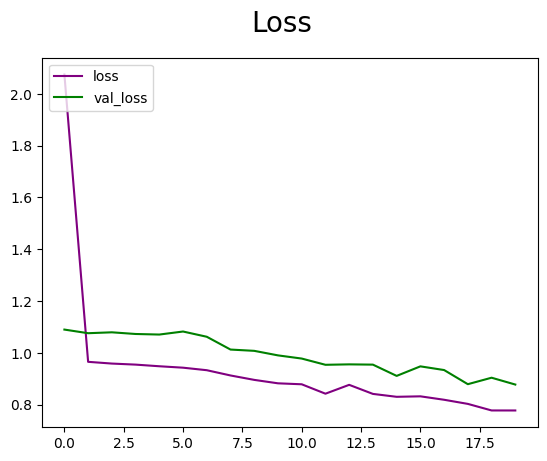

In [ ]:
# Plot Loss Graph
fig = plt.figure()
plt.plot(trainedM.history['loss'], color='purple', label='loss')
plt.plot(trainedM.history['val_loss'], color='green', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

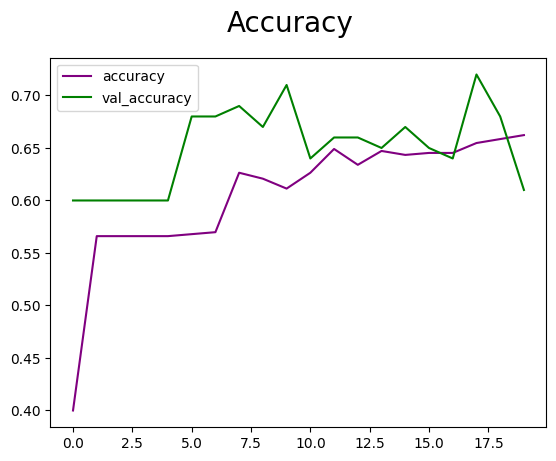

In [ ]:
fig = plt.figure()
plt.plot(trainedM.history['accuracy'], color='purple', label='accuracy')
plt.plot(trainedM.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Performance Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import pandas as pd
import seaborn as sns


In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

# Load the VGG16 model without the top layers (include_top=False)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing the VGG16 model layers weights
for layer in vgg_model.layers:
    layer.trainable = False

# Creating a new model a new model using the VGG16 model as a base
model = Sequential()
model.add(vgg_model)


# Adding  a new classifier layer on top of the base model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

# Compile the model with the desired optimizer and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the data
history = model.fit(training_set, epochs=20, batch_size=32, validation_data=val_set)


Epoch 1/20
17/17 [==============================] - 11s 587ms/step - loss: 2.6706 - accuracy: 0.5019 - val_loss: 0.6521 - val_accuracy: 0.7100
Epoch 2/20
17/17 [==============================] - 10s 588ms/step - loss: 0.7613 - accuracy: 0.6774 - val_loss: 0.6284 - val_accuracy: 0.8400
Epoch 3/20
17/17 [==============================] - 8s 492ms/step - loss: 0.6788 - accuracy: 0.7000 - val_loss: 0.5699 - val_accuracy: 0.8200
Epoch 4/20
17/17 [==============================] - 10s 564ms/step - loss: 0.6106 - accuracy: 0.7434 - val_loss: 0.5675 - val_accuracy: 0.7700
Epoch 5/20
17/17 [==============================] - 9s 553ms/step - loss: 0.6199 - accuracy: 0.7302 - val_loss: 0.5037 - val_accuracy: 0.8000
Epoch 6/20
17/17 [==============================] - 8s 497ms/step - loss: 0.5420 - accuracy: 0.8038 - val_loss: 0.5315 - val_accuracy: 0.8300
Epoch 7/20
17/17 [==============================] - 9s 542ms/step - loss: 0.5025 - accuracy: 0.7887 - val_loss: 0.5469 - val_accuracy: 0.7700
Epo

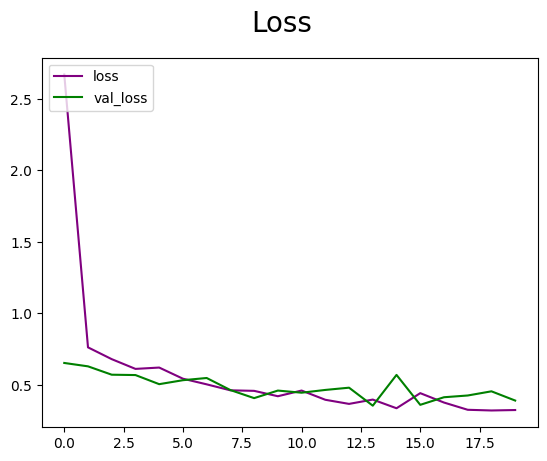

In [ ]:
# Plot Loss Graph
fig = plt.figure()
plt.plot(history.history['loss'], color='purple', label='loss')
plt.plot(history.history['val_loss'], color='green', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

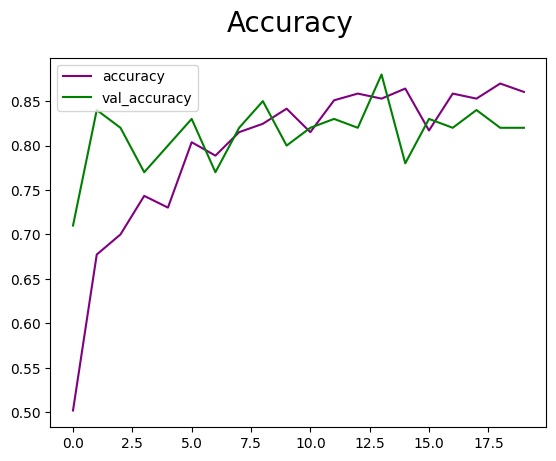

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='purple', label='accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()